In [8]:
import pandas as pd
from sklearn.utils import shuffle

data = shuffle(pd.read_csv("CSV/complete_Dataframe.csv"))

In [9]:
data.head()

,Variance,Max Variance,Scharr,Noise,Status
3907,0.029752,2.227451,0.006827,1.368198,0
5276,0.080118,2.678431,0.012675,0.969631,0
277,0.000669,0.411765,0.000395,0.092663,1
4329,0.028960,2.305882,0.004646,0.734648,0
2096,0.000251,0.298039,0.000382,0.253159,1


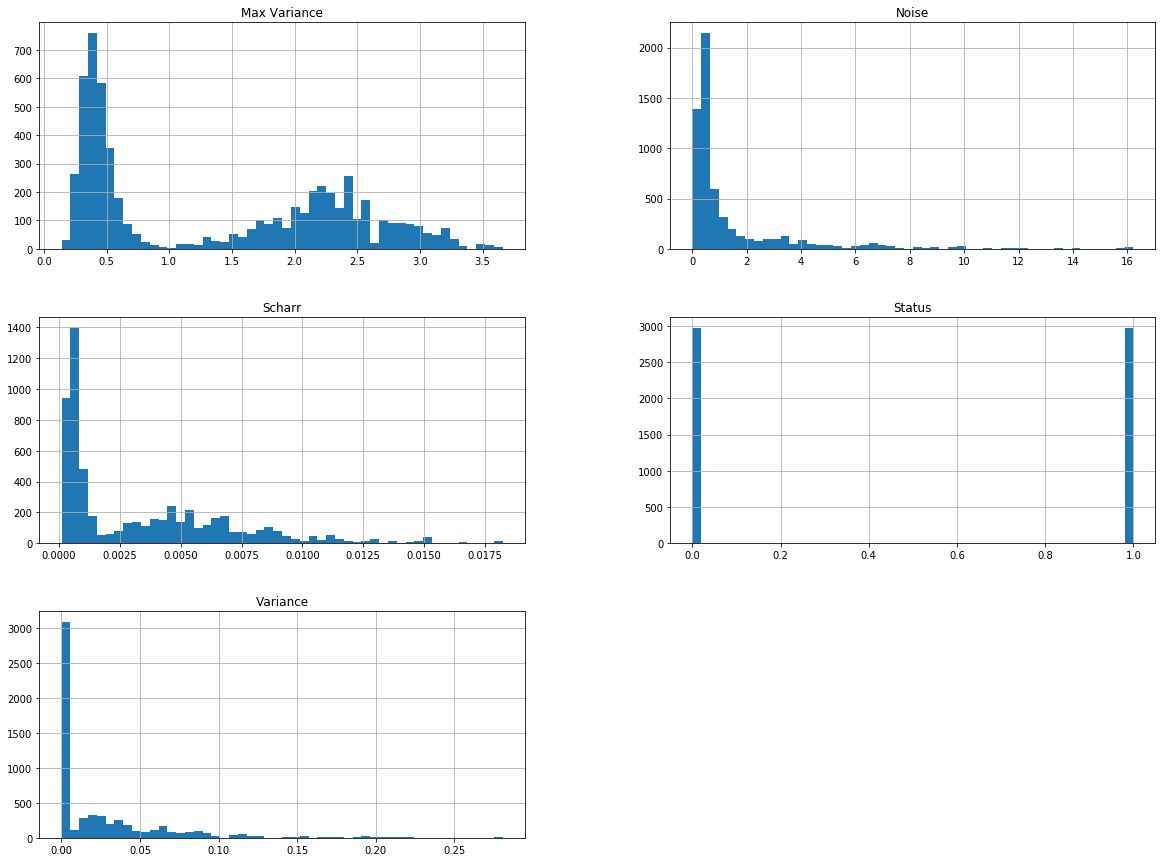

In [10]:
import matplotlib.pyplot  as plt
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbde45df7b8>,
      dtype=object)

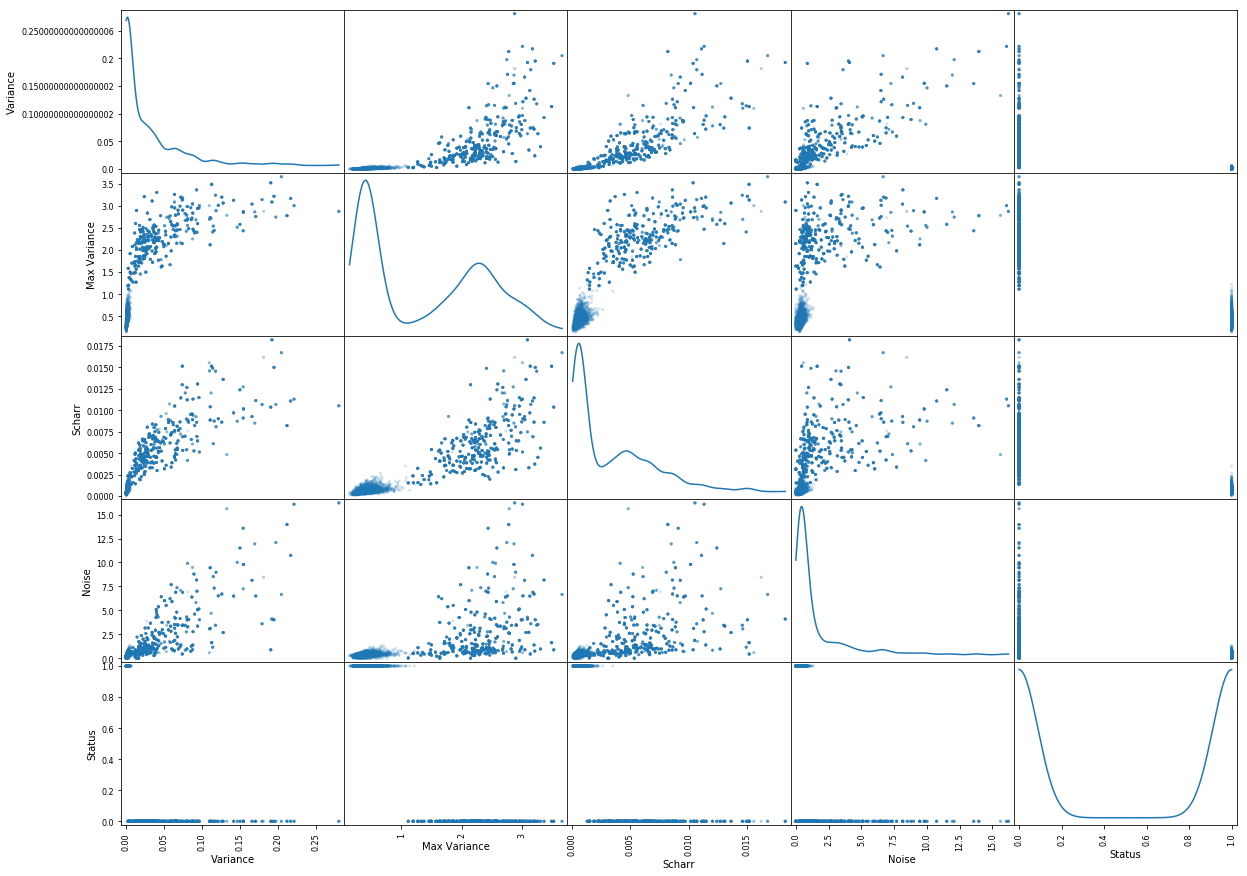

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize =(20,15),diagonal ='kde')

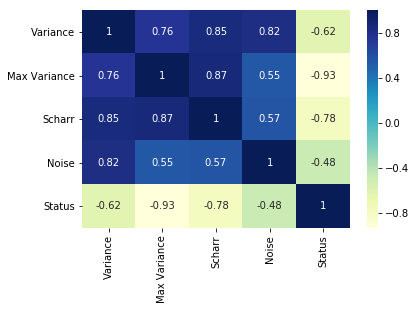

In [12]:
from seaborn import heatmap
heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [13]:
y=data["Status"]

In [14]:
X1=data.drop(["Max Variance","Noise","Status"],axis=1)

In [45]:
n_neigbors=1 

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y, random_state = 45, test_size =0.25)

from sklearn.neighbors import KNeighborsClassifier
X1_clf=KNeighborsClassifier(n_neighbors=n_neigbors).fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(X1_clf,X_train,y_train, cv=3, scoring="accuracy")

from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(X1_clf,X_train, y_train,cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[2241,    0],
       [   8, 2215]])

In [47]:
X2=data.drop(["Variance","Noise","Status"],axis=1)

In [48]:

X_train, X_test, y_train, y_test = train_test_split(X2,y, random_state = 45, test_size =0.25)


X2_clf=KNeighborsClassifier(n_neighbors=n_neigbors).fit(X_train, y_train)


cross_val_score(X2_clf,X_train,y_train, cv=3, scoring="accuracy")


y_train_2=cross_val_predict(X2_clf,X_train, y_train,cv=3)


confusion_matrix(y_train, y_train_2)

array([[2241,    0],
       [   3, 2220]])

In [49]:
X3=data.drop(["Scharr","Noise","Status"],axis=1)

In [50]:

X_train, X_test, y_train, y_test = train_test_split(X3,y, random_state = 45, test_size =0.25)


X3_clf=KNeighborsClassifier(n_neighbors=n_neigbors).fit(X_train, y_train)


cross_val_score(X3_clf,X_train,y_train, cv=3, scoring="accuracy")


y_train_3=cross_val_predict(X3_clf,X_train, y_train,cv=3)


confusion_matrix(y_train, y_train_3)

array([[2241,    0],
       [   3, 2220]])

In [51]:
X4 =data.drop(["Scharr","Max Variance","Status"],axis=1)

In [52]:

X_train, X_test, y_train, y_test = train_test_split(X4,y, random_state = 45, test_size =0.25)


X4_clf=KNeighborsClassifier(n_neighbors=n_neigbors).fit(X_train, y_train)

cross_val_score(X4_clf,X_train,y_train, cv=3, scoring="accuracy")


y_train_4=cross_val_predict(X4_clf,X_train, y_train,cv=3)


confusion_matrix(y_train, y_train_4)

array([[2241,    0],
       [  15, 2208]])

In [53]:
X5=data.drop(["Status"],axis=1)

In [54]:

X_train, X_test, y_train, y_test = train_test_split(X5,y, random_state = 45, test_size =0.25)


X5_clf=KNeighborsClassifier(n_neighbors=n_neigbors).fit(X_train, y_train)


cross_val_score(X5_clf,X_train,y_train, cv=3, scoring="accuracy")


y_train_5=cross_val_predict(X5_clf,X_train, y_train,cv=3)


confusion_matrix(y_train, y_train_5)

array([[2241,    0],
       [   2, 2221]])

In [55]:
from joblib import dump
dump(X1_clf,"models/KNC_model_VarianceScharr.ml")
dump(X2_clf,"models/KNC_model_MaxVarianceScharr.ml")
dump(X4_clf,"models/KNC_model_VarianceNoise.ml")
dump(X5_clf,"models/KNC_model_all.ml")

['models/KNC_model_all.ml']